In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('horse.csv')
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

In [5]:
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [6]:
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [7]:
Surgery = pd.get_dummies(data['surgery'],drop_first=True)
Age = pd.get_dummies(data['age'],drop_first=True)
Temp_of_extremities = pd.get_dummies(data['temp_of_extremities'],drop_first=True)
Peripheral_pulse = pd.get_dummies(data['peripheral_pulse'],drop_first=True)
Mucous_membrane = pd.get_dummies(data['mucous_membrane'],drop_first=True)
Capillary_refill_time = pd.get_dummies(data['capillary_refill_time'],drop_first=True)
Abdomo_appearance = pd.get_dummies(data['abdomo_appearance'],drop_first=True)
Outcome = pd.get_dummies(data['outcome'],drop_first=True)
Surgical_lesion = pd.get_dummies(data['surgical_lesion'],drop_first=True)

In [8]:
Pain = pd.get_dummies(data['pain'],drop_first=True)
Peristalsis = pd.get_dummies(data['peristalsis'],drop_first=True)
Abdominal_distention = pd.get_dummies(data['abdominal_distention'],drop_first=True)
Nasogastric_tube = pd.get_dummies(data['nasogastric_tube'],drop_first=True)
Nasogastric_reflux = pd.get_dummies(data['nasogastric_reflux'],drop_first=True)
Rectal_exam_feces = pd.get_dummies(data['rectal_exam_feces'],drop_first=True)
Abdomen = pd.get_dummies(data['abdomen'],drop_first=True)

In [9]:
data.drop(['surgery','age','temp_of_extremities','peripheral_pulse','mucous_membrane','capillary_refill_time','abdomo_appearance',
          'outcome','surgical_lesion','cp_data'],axis=1,inplace=True)
data

,hospital_number,rectal_temp,pulse,respiratory_rate,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101,38.5,66.0,28.0,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,11300,0,0
1,534817,39.2,88.0,20.0,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,2.0,2208,0,0
2,530334,38.3,40.0,24.0,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,0,0,0
3,5290409,39.1,164.0,84.0,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,5.3,2208,0,0
4,530255,37.3,104.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,4300,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,3205,0,0
295,527702,37.2,72.0,24.0,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,3.3,2208,0,0
296,529386,37.5,72.0,30.0,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,3205,0,0
297,530612,36.5,100.0,24.0,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,3.4,2208,0,0


In [10]:
data.drop(['pain','peristalsis','abdominal_distention','nasogastric_tube','nasogastric_reflux','rectal_exam_feces','abdomen'],axis=1,inplace=True)
data

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,0
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,0
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,0
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,0


In [11]:
data = pd.concat([data,Surgery , Age , Temp_of_extremities , Peripheral_pulse , Mucous_membrane , Capillary_refill_time , 
                  Abdomo_appearance , Outcome ,Surgical_lesion,Pain,Peristalsis,Abdominal_distention,Nasogastric_tube,
                  Nasogastric_reflux,Rectal_exam_feces,Abdomen],axis=1)
data

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,slight,more_1_liter,none,decreased,increased,normal,distend_small,firm,normal,other
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,...,0,0,0,1,0,0,0,0,0,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,...,0,0,0,0,0,0,0,0,0,1
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,...,0,0,0,0,0,1,0,0,1,0
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0,0,0,1,0,0,0,0,0,0
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,...,0,0,0,0,0,0,0,0,0,0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,...,0,0,1,0,0,0,1,0,0,0
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,...,1,0,1,1,0,0,0,0,0,0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,...,0,0,1,0,0,0,1,0,0,0


In [12]:
data

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,slight,more_1_liter,none,decreased,increased,normal,distend_small,firm,normal,other
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,...,0,0,0,1,0,0,0,0,0,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,...,0,0,0,0,0,0,0,0,0,1
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,...,0,0,0,0,0,1,0,0,1,0
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0,0,0,1,0,0,0,0,0,0
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,...,0,0,0,0,0,0,0,0,0,0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,...,0,0,1,0,0,0,1,0,0,0
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,...,1,0,1,1,0,0,0,0,0,0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,...,0,0,1,0,0,0,1,0,0,0


In [13]:
new_data = data.fillna(data.mean())
new_data

C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,slight,more_1_liter,none,decreased,increased,normal,distend_small,firm,normal,other
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,...,0,0,0,1,0,0,0,0,0,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,...,0,0,0,0,0,0,0,0,0,1
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,...,0,0,0,0,0,1,0,0,1,0
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0,0,0,1,0,0,0,0,0,0
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,...,0,0,0,0,0,0,0,0,0,0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,...,0,0,1,0,0,0,1,0,0,0
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,...,1,0,1,1,0,0,0,0,0,0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,...,0,0,1,0,0,0,1,0,0,0


In [14]:
new_data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
new_data

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,slight,more_1_liter,none,decreased,increased,normal,distend_small,firm,normal,other
0,530101,38.5,66.0,28.0,2.0,45.0,8.4,2.0,11300,0,...,0,0,0,1,0,0,0,0,0,0
1,534817,39.2,88.0,20.0,2.0,50.0,85.0,2.0,2208,0,...,0,0,0,0,0,0,0,0,0,1
2,530334,38.3,40.0,24.0,2.0,33.0,6.7,2.0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0,0,0,1,0,0,0,0,0,0
4,530255,37.3,104.0,35.0,2.0,74.0,7.4,2.0,4300,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,38.0,120.0,70.0,2.0,55.0,65.0,2.0,3205,0,...,0,0,0,0,0,0,0,0,0,0
295,527702,37.2,72.0,24.0,2.0,44.0,6.5,3.3,2208,0,...,0,0,1,0,0,0,1,0,0,0
296,529386,37.5,72.0,30.0,2.0,60.0,6.8,2.0,3205,0,...,1,0,1,1,0,0,0,0,0,0
297,530612,36.5,100.0,24.0,2.0,50.0,6.0,3.4,2208,0,...,0,0,1,0,0,0,1,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
y = new_data['lived']
x = new_data.drop('lived',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=99)

In [16]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, x_train, y_train, cv=10)
clf.fit(x_train,y_train, sample_weight=None, check_input=True, X_idx_sorted=None)
clf.get_params(deep=True)
clf.predict(x_test, check_input=True)
clf.predict_log_proba(x_test)
clf.predict(x_test,check_input=True)
print('Accuracy for Decision Tree')
print(clf.score(x_test,y_test, sample_weight=None))

Accuracy for Decision Tree
0.8


C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\tree\tree.py:890: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [17]:
#!pip install pydotplus

[Text(709.8088235294117, 1041.9, 'X[28] <= 0.5\ngini = 0.484\nsamples = 239\nvalue = [98, 141]'),
 Text(676.985294117647, 951.3000000000001, 'X[5] <= 52.5\ngini = 0.429\nsamples = 205\nvalue = [64, 141]'),
 Text(336.44117647058823, 860.7, 'X[29] <= 0.5\ngini = 0.32\nsamples = 160\nvalue = [32, 128]'),
 Text(98.47058823529412, 770.1, 'X[38] <= 0.5\ngini = 0.078\nsamples = 74\nvalue = [3, 71]'),
 Text(65.6470588235294, 679.5, 'X[0] <= 2907428.5\ngini = 0.053\nsamples = 73\nvalue = [2, 71]'),
 Text(32.8235294117647, 588.9, 'gini = 0.0\nsamples = 66\nvalue = [0, 66]'),
 Text(98.47058823529412, 588.9, 'X[0] <= 5292849.0\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(65.6470588235294, 498.29999999999995, 'X[3] <= 36.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(32.8235294117647, 407.69999999999993, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(98.47058823529412, 407.69999999999993, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(131.2941176470588, 498.29999999999995, 'gini

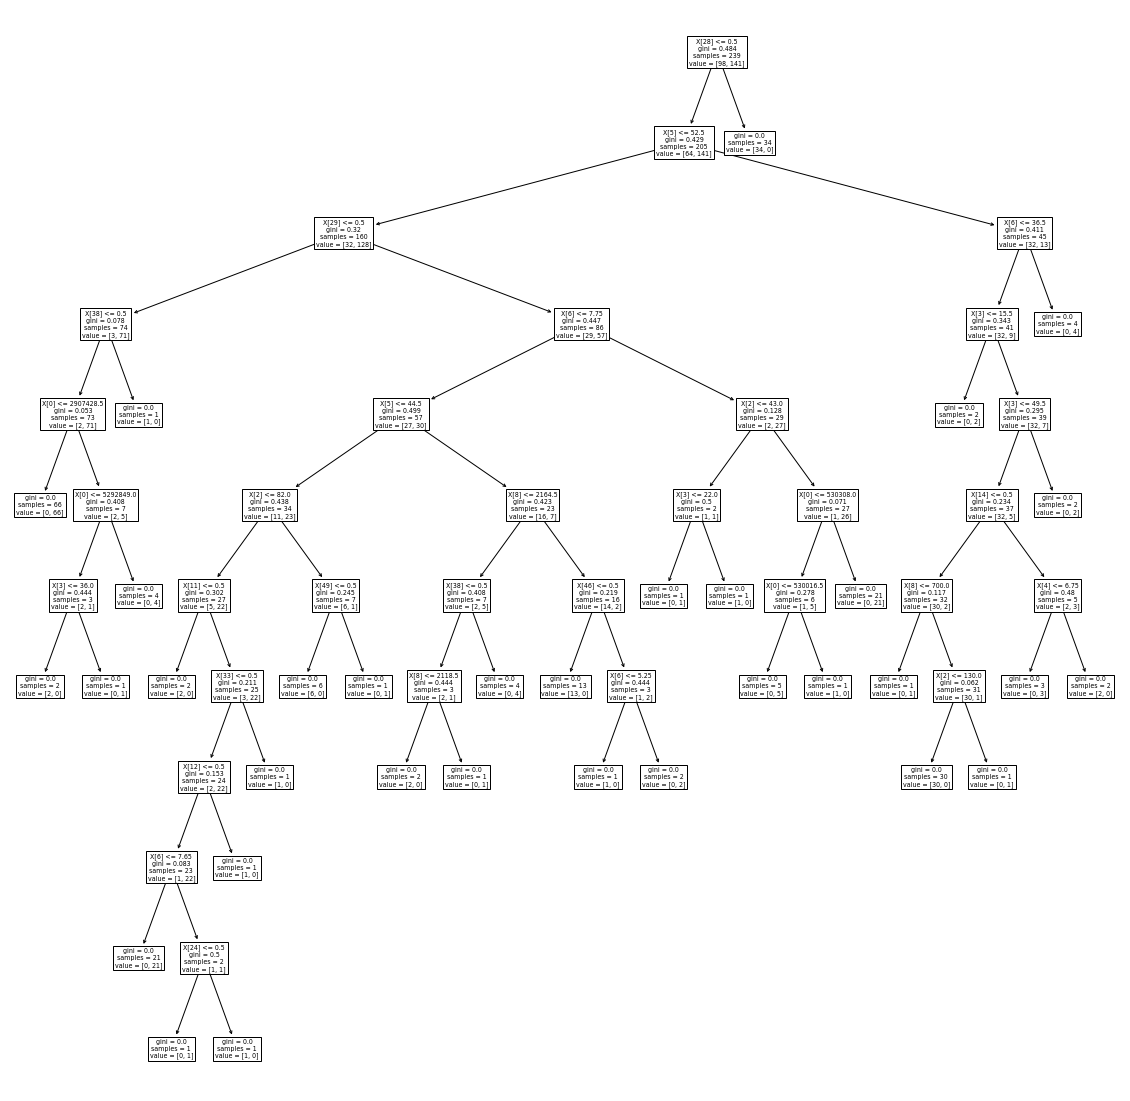

In [33]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf)  


In [ ]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)# now fit our model for training data
prediction=model.predict(x_test)# predict for the test data
print('Accuracy for Random Forest')
print(metrics.accuracy_score(prediction,y_test))